# Building Regression Models

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import pickle 

In [2]:
# Open pickled dataframe from EDA
with open("datasets/anime_normal.p", "rb") as f:
    df = pickle.load(f)
    f.close()
df.head(3)

,rating,average_episode_duration,num_episodes,title_len,synopsis_len,synop_pol,title_pol,synop_subj,title_subj,num_related_anime,...,Kyoto Animation,Shaft,DLE,other_studio,Drama,Kids,Shounen,Sci-Fi,Shoujo,other_genres
8,8.98,1500,22,30,802,0.068571,0.0,0.386190,0.0,2,...,0.0,1.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1
9,8.98,1440,12,14,844,-0.050000,0.0,0.487500,0.0,2,...,0.0,0.0,0.0,1,0.0,0.0,1.0,1.0,0.0,1
10,8.95,1460,24,17,786,-0.030022,0.0,0.568063,0.0,3,...,1.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1


The "Popularity" column is not a feature, it is for weights. So, we will remove it and reset our indices. Then, we will create our X and y dataframes, containing our features and target, respectively.

In [3]:
# Popularity is for weights, not a feature, so we remove it and reset indices
df = df.drop('popularity', axis=1)
df = df.reset_index(drop=True)

# Define features and target
features = ['average_episode_duration', 'num_episodes', 'title_len', 'synopsis_len',
       'synop_pol', 'title_pol', 'synop_subj', 'title_subj',
       'num_related_anime', 'num_genres', 'num_studios', 'pic_colorfulness',
       'EMT Squared', 'Bones', 'Production I.G', 'A-1 Pictures',
       'Madhouse', 'Kyoto Animation', 'Shaft', 'DLE', 'other_studio', 'Drama',
       'Kids', 'Shounen', 'Sci-Fi', 'Shoujo', 'other_genres', 'source']

target = 'rating'

# Create X and y dataframes
X = df[features]
y = df[target]

# Creating our Preprocessors

In [4]:
# Import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [5]:
X.columns

Index(['average_episode_duration', 'num_episodes', 'title_len', 'synopsis_len',
       'synop_pol', 'title_pol', 'synop_subj', 'title_subj',
       'num_related_anime', 'num_genres', 'num_studios', 'pic_colorfulness',
       'EMT Squared', 'Bones', 'Production I.G', 'A-1 Pictures', 'Madhouse',
       'Kyoto Animation', 'Shaft', 'DLE', 'other_studio', 'Drama', 'Kids',
       'Shounen', 'Sci-Fi', 'Shoujo', 'other_genres', 'source'],
      dtype='object')

In [51]:
cont_cols = ['average_episode_duration', 'num_episodes', 'title_len', 'synopsis_len',
       'synop_pol', 'title_pol', 'synop_subj', 'title_subj',
       'num_related_anime', 'num_genres', 'num_studios', 'pic_colorfulness']

cat_cols = ['EMT Squared', 'Bones', 'Production I.G', 'A-1 Pictures',
       'Madhouse', 'Kyoto Animation', 'Shaft', 'DLE', 'other_studio', 'Drama',
       'Kids', 'Shounen', 'Sci-Fi', 'Shoujo', 'other_genres', 'source']

cont_index = [X.columns.get_loc(c) for c in cont_cols]
cat_index = [X.columns.get_loc(c) for c in cat_cols]
source_index = X.columns.get_loc('source')

imp_preproc = ColumnTransformer(remainder='passthrough', transformers=[
    ('imp_cont', SimpleImputer(strategy='mean'), cont_index),
    ('imp_cat', SimpleImputer(strategy='most_frequent'), cat_index),
])

source_preproc = ColumnTransformer(remainder='passthrough', transformers=[
    ('ord', OrdinalEncoder(handle_unknown='ignore'), [source_index]),
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='error', drop="first"), [source_index])
])

drop_preproc = ColumnTransformer(remainder='drop', transformers=[
    ('drop_first', SimpleImputer(strategy='mean'), [i for i in range(1,31)]),
])

## TEST PROCESSORS

In [39]:
cont_cols = ['average_episode_duration', 'num_episodes', 'title_len', 'synopsis_len',
       'synop_pol', 'title_pol', 'synop_subj', 'title_subj',
       'num_related_anime', 'num_genres', 'num_studios', 'pic_colorfulness']

cat_cols = ['EMT Squared', 'Bones', 'Production I.G', 'A-1 Pictures',
       'Madhouse', 'Kyoto Animation', 'Shaft', 'DLE', 'other_studio', 'Drama',
       'Kids', 'Shounen', 'Sci-Fi', 'Shoujo', 'other_genres']

cont_index = [X.columns.get_loc(c) for c in cont_cols]
cat_index = [X.columns.get_loc(c) for c in cat_cols]
source_index = X.columns.get_loc('source')

imp_preproc = ColumnTransformer(remainder='drop', transformers=[
    ('imp_cont', SimpleImputer(strategy='mean'), cont_index),
    #('imp_cat', SimpleImputer(strategy='most_frequent'), cat_index),
])

# source_preproc = ColumnTransformer(remainder='passthrough', transformers=[
#     ('ord', OrdinalEncoder(handle_unknown='ignore'), [source_index]),
#     ('ohe', OneHotEncoder(sparse=False, handle_unknown='error', drop="first"), [source_index])
# ])

# drop_preproc = ColumnTransformer(remainder='drop', transformers=[
#     ('drop_first', SimpleImputer(strategy='mean'), [i for i in range(1,31)]),
# ])

# Hyperparameter Tuning with GridSearchCV

In [78]:
from sklearn.model_selection import GridSearchCV, ParameterGrid, KFold

ImportError: cannot import name 'Kfold' from 'sklearn.model_selection' (C:\Users\Brennan\anaconda3\envs\mal\lib\site-packages\sklearn\model_selection\__init__.py)

In [99]:
# Parameter grid for GridSearchCV
model_grid = {
    'linear_reg': {
        'model':LinearRegression(),
        'params': {
            'normalize': [True, False]
        }
    },
    'lasso': {
        'model':Lasso(max_iter=50000),
        'params': {
            # 'alpha': np.logspace(-6, 6, 50)
            'alpha': [2e-06, 3.0888435964774785e-06, 4e-06,]
        }
    },
    'ridge': {
        'model':Ridge(max_iter=50000),
        'params': {
            # 'alpha': np.logspace(-6, 6, 50)
            'alpha': [0.010, 0.014563484775012445, 0.020]
        }
    },
    'random_forest': {
        'model':RandomForestRegressor(random_state=15, n_jobs=3, n_estimators=1000),
        'params': {
            'max_depth': [None, 14, 18, 22, 26],
            'criterion':['mse', 'mae']
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(random_state=15),
        'params': {
            'loss': ['ls', 'lad', 'huber'],
            'criterion':['friedman_mse', 'mse'],
            'max_depth': [4, 6, 8, 10]
        }
    }
}

# Testing our Models

In [100]:
def CV_score(X, y, splits, model):
    scores = []
    CV_pipe = Pipeline(steps=[
        ('imp_preprocessor', imp_preproc),
        ('source_preprocessor', source_preproc),
        ('drop_preprocessor', drop_preproc),
        ('minmax', MinMaxScaler()),
        ('estimator', model)
    ])

    for train_index, test_index in splits:
        X_train = X.iloc[train_index,:]
        X_test = X.iloc[test_index,:]
        y_train = y.iloc[train_index]
        y_test = y.iloc[test_index]

        CV_imp = SimpleImputer(strategy='mean', missing_values=np.nan)
        y_train = CV_imp.fit_transform(np.array(y_train).reshape(-1, 1))
        y_test = CV_imp.transform(np.array(y_test).reshape(-1, 1))

        CV_pipe.fit(X, y)
        scores.append(CV_pipe.score(X_test, y_test))

    return np.average(scores)

In [101]:
results = []

for model_name, mp in model_grid.items():
    avg_scores = []
    model_params = []
    for g in ParameterGrid(mp['params']):
        model = mp['model']
        model.set_params(**g)

        kf = KFold(n_splits=4, shuffle=True, random_state=5)
        splits = kf.split(df)
        score = CV_score(X, y, splits, model)

        avg_scores.append(score)
        model_params.append(g)

    best_index = avg_scores.index(np.max(avg_scores))
    results.append({
        'model': model_name,
        'params':model_params[best_index],
        'score': avg_scores[best_index],
    })
    print(model_name, avg_scores)

results

linear_reg [0.3808459920474448, 0.38084599204744485]
lasso [0.3808460867676069, 0.3808461114705729, 0.380846117609378]
ridge [0.38084620786240736, 0.3808462547489881, 0.3808462687591151]
random_forest [0.9204561874470689, 0.8517341372119371, 0.9056058063998514, 0.9182332019615149, 0.9201999230926015, 0.9191772276075056, 0.8159094294916948, 0.8836404373214892, 0.9080321659267232, 0.9160039599740035]
gradient_boosting [0.5986322879995927, 0.7689010704052587, 0.9087905810673264, 0.9746535366217544, 0.5384446081160019, 0.629018149742448, 0.7098261727189715, 0.80268659393751, 0.5874823497903201, 0.7426873421283066, 0.8939279392203052, 0.9606976913978904, 0.5986322879995927, 0.7689010704052587, 0.9087905810673264, 0.9746535366217544, 0.5384446081160019, 0.629018149742448, 0.7044803697902844, 0.8067882677342605, 0.5874823497903201, 0.7426873421283066, 0.890989671854228, 0.9583365081620413]


[{'model': 'linear_reg',
  'params': {'normalize': False},
  'score': 0.38084599204744485},
 {'model': 'lasso', 'params': {'alpha': 4e-06}, 'score': 0.380846117609378},
 {'model': 'ridge', 'params': {'alpha': 0.02}, 'score': 0.3808462687591151},
 {'model': 'random_forest',
  'params': {'criterion': 'mse', 'max_depth': None},
  'score': 0.9204561874470689},
 {'model': 'gradient_boosting',
  'params': {'criterion': 'friedman_mse', 'loss': 'ls', 'max_depth': 10},
  'score': 0.9746535366217544}]

# Feature Importance in the Linear Regressor

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, median_absolute_error

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

test_imp = SimpleImputer(strategy='mean', missing_values=np.nan)
y_train = test_imp.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = test_imp.transform(np.array(y_test).reshape(-1, 1))

lr_pipe = Pipeline(steps=[
        ('imp_preprocessor', imp_preproc),
        ('source_preprocessor', source_preproc),
        ('drop_preprocessor', drop_preproc),
        ('minmax', MinMaxScaler()),
        ('estimator', LinearRegression())
    ])

lr_pipe.fit(X_train, y_train)
print("R2 Value: ", lr_pipe.score(X_test, y_test))
print("Mean Squared Error: ", mean_squared_error(y_test, lr_pipe.predict(X_test)))
print("Median Absolute Error: ", median_absolute_error(y_test, lr_pipe.predict(X_test)))

R2 Value:  0.391162808556213
Mean Squared Error:  0.37574733638177044
Median Absolute Error:  0.4174670592929406


In [108]:
lr_pipe.named_steps

{'imp_preprocessor': ColumnTransformer(remainder='passthrough',
                   transformers=[('imp_cont', SimpleImputer(),
                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]),
                                 ('imp_cat',
                                  SimpleImputer(strategy='most_frequent'),
                                  [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                   23, 24, 25, 26, 27])]),
 'source_preprocessor': ColumnTransformer(remainder='passthrough',
                   transformers=[('ord', OrdinalEncoder(handle_unknown='ignore'),
                                  [27]),
                                 ('ohe',
                                  OneHotEncoder(drop='first', sparse=False),
                                  [27])]),
 'drop_preprocessor': ColumnTransformer(transformers=[('drop_first', SimpleImputer(),
                                  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                     

In [111]:
new_features = list(lr_pipe.named_steps['source_preprocessor'].transformers_[1][1].categories_[0]) + features
new_features.remove('source')
new_features.remove('manga')

df_feature_importance = pd.DataFrame({
    'Features': new_features,
    'Coeff': lr_pipe.named_steps['estimator'].coef_[0],
    'ABS(Coeff)': lr_pipe.named_steps['estimator'].coef_[0]
}).set_index('Features').sort_values('ABS(Coeff)', ascending=False)
df_feature_importance

,Coeff,ABS(Coeff)
Features,,
num_related_anime,2.091139,2.091139
synopsis_len,1.199999,1.199999
average_episode_duration,1.175362,1.175362
Kyoto Animation,0.798179,0.798179
Shaft,0.781327,0.781327
Bones,0.677000,0.677000
num_episodes,0.654172,0.654172
Production I.G,0.638167,0.638167
A-1 Pictures,0.604359,0.604359


C:\Users\Brennan\anaconda3\envs\mal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Count'>

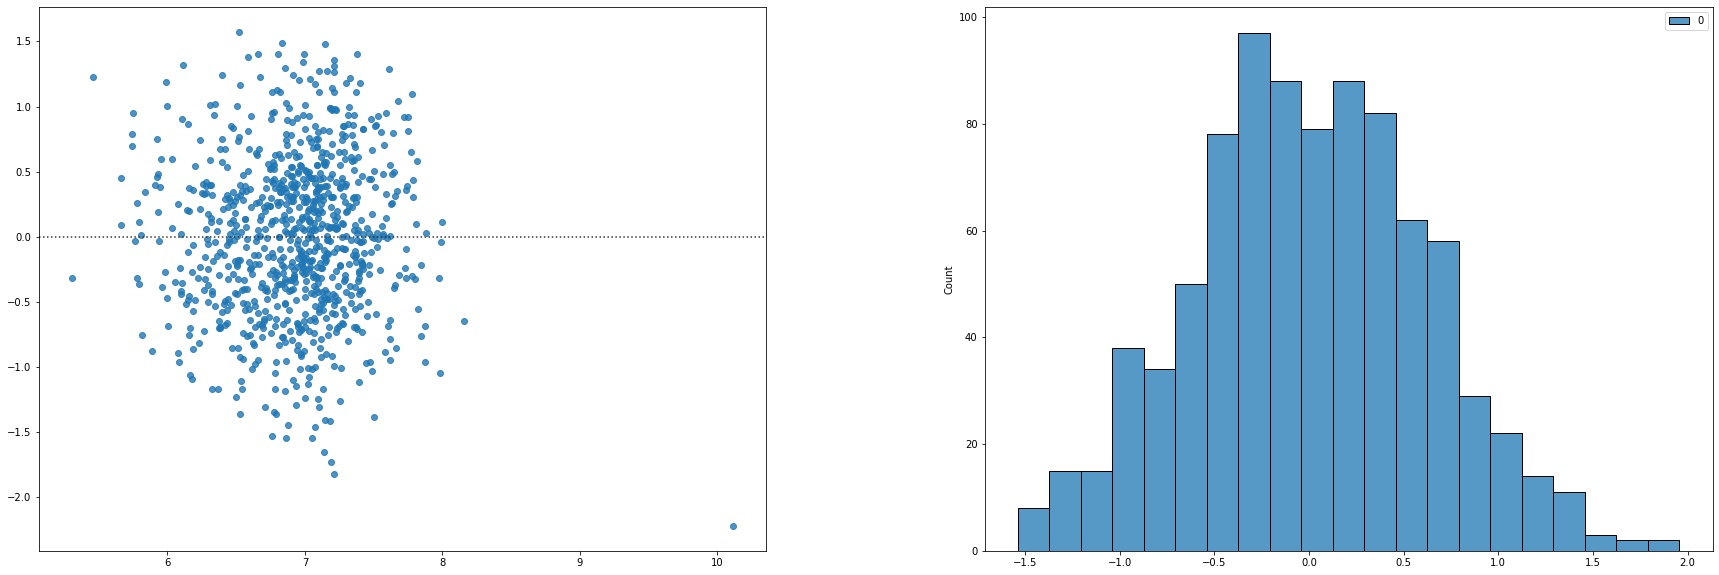

In [113]:
plt.rcParams['figure.figsize'] = [30, 10]
plt.rcParams['figure.subplot.wspace'] = 0.3
plt.rcParams['figure.subplot.hspace'] = 0.7

fig = plt.figure()

ax = fig.add_subplot(1, 2, 1)
sns.residplot(lr_pipe.predict(X_test), y_test, ax=ax)
ax = fig.add_subplot(1, 2, 2)
sns.histplot(lr_pipe.predict(X_test) - y_test, ax=ax)
plt.show()

# Choosing Our Best Model

## Dummy Regressor

In [116]:
from sklearn.dummy import DummyRegressor

dummy_pipe = Pipeline(steps=[
        ('imp_preprocessor', imp_preproc),
        ('source_preprocessor', source_preproc),
        ('drop_preprocessor', drop_preproc),
        ('minmax', MinMaxScaler()),
        ('estimator', DummyRegressor())
    ])

dummy_pipe.fit(X_train, y_train)
print("R2 Value: ", dummy_pipe.score(X_test, y_test))
print("Mean Squared Error: ", mean_squared_error(y_test, dummy_pipe.predict(X_test)))
print("Median Absolute Error: ", median_absolute_error(y_test, dummy_pipe.predict(X_test)))

R2 Value:  -2.8271355185793823e-06
Mean Squared Error:  0.6171574337950138
Median Absolute Error:  0.5357894736842104


## Random Forest Regressor and Gradient Boost Regressor

In [117]:
rantree_pipe = Pipeline(steps=[
        ('imp_preprocessor', imp_preproc),
        ('source_preprocessor', source_preproc),
        ('drop_preprocessor', drop_preproc),
        ('minmax', MinMaxScaler()),
        ('estimator', RandomForestRegressor(random_state=15, n_jobs=3, n_estimators=500, criterion='mse', max_depth=None))
    ])

gboost_pipe = Pipeline(steps=[
        ('imp_preprocessor', imp_preproc),
        ('source_preprocessor', source_preproc),
        ('drop_preprocessor', drop_preproc),
        ('minmax', MinMaxScaler()),
        ('estimator', GradientBoostingRegressor(random_state=15, criterion='friedman_mse', loss='ls', max_depth=4))
    ])

rantree_pipe.fit(X_train, y_train.ravel())
gboost_pipe.fit(X_train, y_train.ravel())

print("RANDOM FOREST REGRESSOR\n==============")
print("R2 Value: ", rantree_pipe.score(X_test, y_test))
print("Mean Squared Error: ", mean_squared_error(y_test, rantree_pipe.predict(X_test)))
print("Median Absolute Error: ", median_absolute_error(y_test, rantree_pipe.predict(X_test)))

print("\nGRADIENT BOOST REGRESSOR\n==============")
print("R2 Value: ", gboost_pipe.score(X_test, y_test))
print("Mean Squared Error: ", mean_squared_error(y_test, gboost_pipe.predict(X_test)))
print("Median Absolute Error: ", median_absolute_error(y_test, gboost_pipe.predict(X_test)))

RANDOM FOREST REGRESSOR
R2 Value:  0.4199810248806759
Mean Squared Error:  0.3579620102299426
Median Absolute Error:  0.4088999999999956
GRADIENT BOOST REGRESSOR
R2 Value:  0.45025847652145745
Mean Squared Error:  0.33927610870104113
Median Absolute Error:  0.39313912069276125


# Checking the Residuals

In [119]:
plt.rcParams['figure.figsize'] = [30, 10]
plt.rcParams['figure.subplot.wspace'] = 0.3
plt.rcParams['figure.subplot.hspace'] = 0.7

fig = plt.figure()

ax = fig.add_subplot(2, 2, 1)
sns.residplot(rantree_pipe.predict(X_test), y_test, ax=ax)

ax = fig.add_subplot(2, 2, 2)
sns.histplot(rantree_pipe.predict(X_test) - y_test, ax=ax)

ax = fig.add_subplot(2, 2, 3)
sns.residplot(gboost_pipe.predict(X_test), y_test, ax=ax)

ax = fig.add_subplot(2, 2, 4)
sns.histplot(gboost_pipe.predict(X_test) - y_test, ax=ax)

plt.show()

C:\Users\Brennan\anaconda3\envs\mal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Brennan\anaconda3\envs\mal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Brennan\anaconda3\envs\mal\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


# Saving Our Model

In [ ]:
import gzip, pickletools

# The output of a regular pickle.dump for our random forest is quite large,
# we can compress it using gzip
with gzip.open("server/artifacts/randforest_model.pickle", "wb") as f:
    pickled = pickle.dumps(rf)
    optimized_pickle = pickletools.optimize(pickled)
    f.write(optimized_pickle)
    f.close()

"""Code for loading from a gzipped pickle file"""
# with gzip.open("server/artifacts/randforest_model.pickle", 'rb') as f:
#     p = pickle.Unpickler(f)
#     rf = p.load()

In [ ]:
with open("server/artifacts/pipeline.pickle", "wb") as f:
    pickle.dump(rantree_pipe)
    f.close()
